# **PCA FOR VISUALIZATION AND DIMENSIONALITY REDUCTION**

# **STEP 1: LOAD THE IRIS DATA SET**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
url="/iris.csv"

#load dataset into pandas DAtaframe
df=pd.read_csv(url,names=['sepal length','sepal width','petal length','petal width','target'])

# **STEP 2: STANDARDIZE THE DATA**

In [4]:
from sklearn.preprocessing import StandardScaler
features=['sepal length','sepal width','petal length','petal width']

#separating out the features
x=df.loc[1:,features].values

#separating out the target
y=df.loc[1:,['target']].values

#standardizing the fuatures
x=StandardScaler().fit_transform(x)


# **STEP 3:PCA PROJECTION TO 2D**

In [5]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(x)
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2'])

In [6]:
finalDf=pd.concat([principalDf,df[['target']]],axis=1)

# STEP 4: VISUALIZE 2D PROJECTION

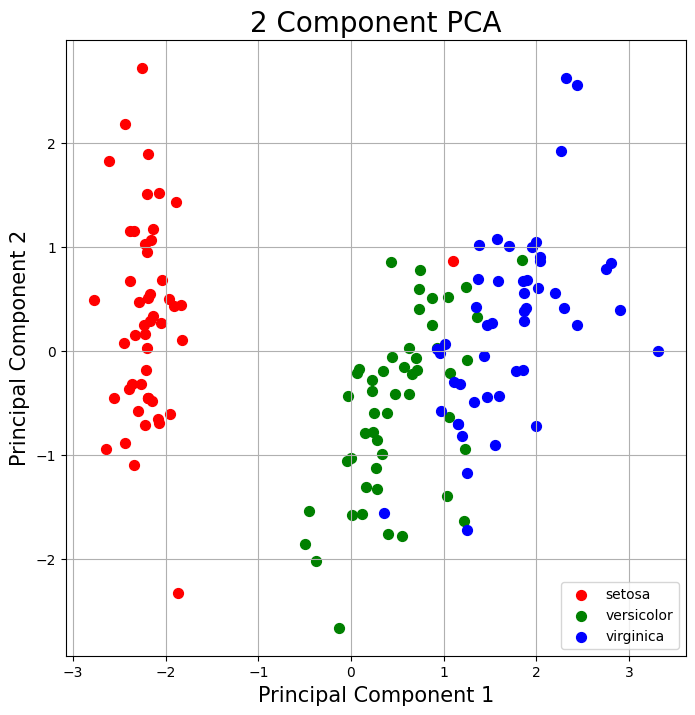

In [8]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1',fontsize=15)
ax.set_ylabel('Principal Component 2',fontsize=15)
ax.set_title('2 Component PCA',fontsize=20)

targets=['setosa','versicolor','virginica']
colors=['r','g','b']
for target,color in zip(targets,colors):
  indicesToKeep=finalDf['target']==target
  ax.scatter(finalDf.loc[indicesToKeep,'principal component 1'],
             finalDf.loc[indicesToKeep,'principal component 2'],
             c=color,s=50)
  ax.legend(targets)
  ax.grid()

In [9]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

# **PCA TO SPEED-UP MACHINE LEARNING ALGORITHMS**

In [11]:
#step 1: download and load the data
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784')


In [12]:
#step2:split data into training and test sets
from sklearn.model_selection import train_test_split

#test_size:what proportion of original data is used for test set
train_img,test_img,train_lbl,test_lbl=train_test_split(mnist.data,mnist.target,test_size=1/7.0,random_state=0)

In [13]:
#step 3: standardize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#fit on training set only
scaler.fit(train_img)

#transform training and test sets
train_img=scaler.transform(train_img)
test_img=scaler.transform(test_img)

In [17]:
#step 4: ilmport and apply pca
from sklearn.decomposition import PCA

#make an instance of the model
pca=PCA(.95)

In [18]:
pca.fit(train_img)

PCA(n_components=0.95)

In [19]:
#step 5: Apply the mapping(transform to the training set and the test set
train_img=pca.transform(train_img)
test_img=pca.transform(test_img)

In [20]:
#step6:apply logistic regression to the transformed data
#1.import the model you want to use
from sklearn.linear_model import LogisticRegression

In [21]:
#2. Make an instance of the model
#all parameters not specified are set to their defaults
#default solver is incredibly slow which is why it why it was changed to 'lbfgs'
logisticRegr=LogisticRegression(solver='lbfgs')

In [22]:
#3.train the model on the data,storing the information learned from the data
logisticRegr.fit(train_img,train_lbl)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
#4.predict the labels of new data(new images)
#predict for one observation(image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

In [24]:
#predict for one observation (image)
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

In [25]:
#step 7:measuring model performance
logisticRegr.score(test_img,test_lbl)

0.9201